In [28]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [29]:
# import seaborn as sns
# data = sns.load_dataset("iris")
# data.columns

In [30]:
# pirmojo duomenų rinkinio nuskaitymas, pertvarkymas ir padalijimas į mokymo ir testavimo aibes
x1 = pd.read_csv('iris.data', sep=",", header=None).values

x1 = x1[x1[:,4] != "Iris-setosa"]
x1 = np.column_stack([np.ones(x1.shape[0]),x1])
x1[:,-1] = np.where(x1[:,-1]=='Iris-virginica',0,1)

X1_train, X1_test, y1_train, y1_test = train_test_split(x1[:,0:-1],x1[:,-1],
                                                        train_size=0.8,random_state=123,stratify=x1[:,-1])

In [31]:
# antrojo duomenų rinkinio nuskaitymas, pertvarkymas ir padalijimas į mokymo ir testavimo aibes
x2 = pd.read_csv('breast-cancer-wisconsin.data', sep=",", header=None).values

x2 = x2[x2[:,6] != "?"]
x2[:,-1] = np.where(x2[:,-1]==2,0,1)
x2 = x2[:,1:]
x2 = np.column_stack([np.ones(x2.shape[0]),x2])
x2 = x2.astype(float)

X2_train, X2_test, y2_train, y2_test = train_test_split(x2[:,0:-1],x2[:,-1],
                                                        train_size=0.8,random_state=123,stratify=x2[:,-1])

In [32]:
def sigmoid(row,weights):
    # Sigmoidine aktyvacijos f-ja
    a = np.dot(row, weights)
    return 1/(1+math.exp(-a))


def threshold(row,weights):
    # Slenkstinė aktyvacijos f-ja
    a = np.dot(row, weights)
    return int(a >= 0)

# abi aktyvacijos funkcijos skirtos paduoti kaip tolimesnių funkcijų argumentas


def update_weights(weights, row, y_true, y_pred, lrate):
    # Svorius atnaujinanti funkcija
    updated_weights = []
    for i in range(len(weights)):
        updated_weights.append(weights[i] + lrate*(y_true - y_pred)*row[i])
    return updated_weights

In [33]:
from matplotlib.ticker import MaxNLocator

def lineplot(y, xlabel, ylabel, title,c="b"):
    # funkcija, skirta nubraižyti linijinį grafiką
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(range(1,len(y)+1),y, alpha = 0.7,c=c)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [92]:
def train_perceptron(X, y, activation, lrate, epochs, plot = True):
    weights = np.full(X.shape[1], 1) # pradiniai svoriai
    errors = []  # paklaidų sąrašas
    accuracies = [] # klasifikavimo tikslumų sąrašas
    
    for e in range(epochs):
        for i in range(len(X)):
            y_true = y[i]
            row = X[i]
            y_pred = round(activation(row, weights),0)
            weights = update_weights(weights, row, y_true, y_pred , lrate)

            
        accuracy, error = test_accuracy(X,y,weights,activation)
        errors.append(error) # sąrašas papildomas paklaida, gauta po kiekvienos epochos
        accuracies.append(accuracy)

    if plot:
        names = {"sigmoid": "sigmoidinę", "threshold": "slenkstinę"}
        lineplot(errors, "Epocha", "Paklaida", "Epochų paklaida, naudojant " + 
                 names[activation.__name__] +
                     " aktyvacijos f-ją","b")
        lineplot(accuracies, "Epocha", "Tikslumas", "Epochų tikslumas mokymo duomenims, naudojant " +
                 names[activation.__name__] +
                     " aktyvacijos f-ją","orange")
    return errors, accuracies, weights

In [93]:
def test_accuracy(X_test, y_test, weights, activation):
    # Apskaičiuoja tikslumą testavimo duomenims, naudojant pasirinktą aktyvacijos funkciją
    correct = []
    error = 0
    for i in range(len(X_test)):
        y_pred = activation(X_test[i],weights)
        correct.append(round(y_pred,0) == y_test[i])
        error += (y_test[i] - y_pred)**2 
    return round(np.mean(correct),2), round(error,2)

### Pirmas duomenų rinkinys

Galutiniai svoriai:  [11.5, 12.4, 20.1, -22.65, -23.0] 
Galutinė paklaida:  2 
Galutinis tikslumas:  0.98 
Tikslumas testavimo duomenims:  0.9 
Paklaida testavimo duomenims:  2


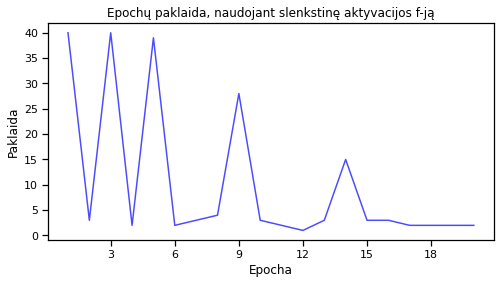

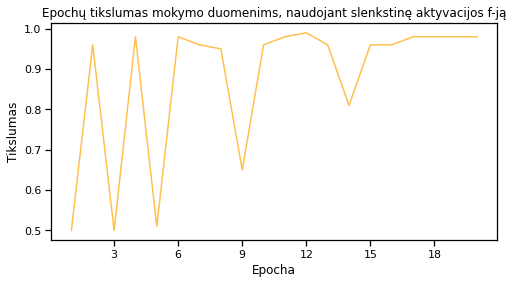

In [94]:
sns.set_context("notebook")
errors, accuracies , weights = train_perceptron(X1_train, y1_train, threshold, 0.5, 20) 
# perceptrono mokymas, naudojantis mokymo duomenimis ir slenstine aktyvacijos funkcija

print("Galutiniai svoriai: ", [round(i,2) for i in weights], 
      "\nGalutinė paklaida: ",  errors[-1],
      "\nGalutinis tikslumas: ",  accuracies[-1],
      "\nTikslumas testavimo duomenims: " ,  test_accuracy(X1_test, y1_test, weights, threshold)[0],
      "\nPaklaida testavimo duomenims: " ,  test_accuracy(X1_test, y1_test, weights, threshold)[1])

Galutiniai svoriai:  [11.5, 12.4, 20.1, -22.65, -23.0] 
Galutinė paklaida:  1.58 
Galutinis tikslumas:  0.98 
Tikslumas testavimo duomenims:  0.9 
Paklaida testavimo duomenims:  1.96


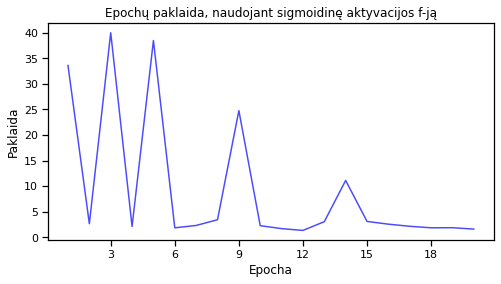

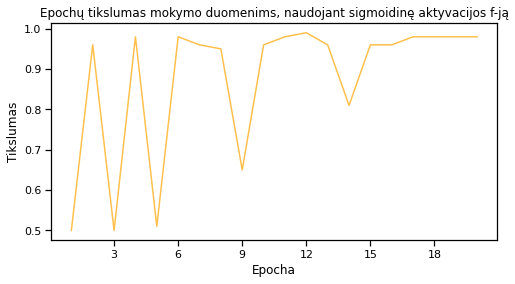

In [95]:
errors, accuracies, weights = train_perceptron(X1_train, y1_train, sigmoid, 0.5, 20)
# sigmoidinė aktyvacijos fuhnkcija


print("Galutiniai svoriai: ", [round(i,2) for i in weights], 
      "\nGalutinė paklaida: ",  errors[-1],
      "\nGalutinis tikslumas: ",  accuracies[-1],
      "\nTikslumas testavimo duomenims: " ,  test_accuracy(X1_test, y1_test, weights, sigmoid)[0],
      "\nPaklaida testavimo duomenims: " ,  test_accuracy(X1_test, y1_test, weights, sigmoid)[1])

### Antras duomenų rinkinys

Galutiniai svoriai:  [-99.0, 1.0, 3.5, 6.5, 9.0, 2.5, 5.0, 1.5, 2.5, 9.0] 
Galutinė paklaida:  19.0 
Galutinis tikslumas:  0.97 
Tikslumas testavimo duomenims:  0.97 
Paklaida testavimo duomenims:  4.0


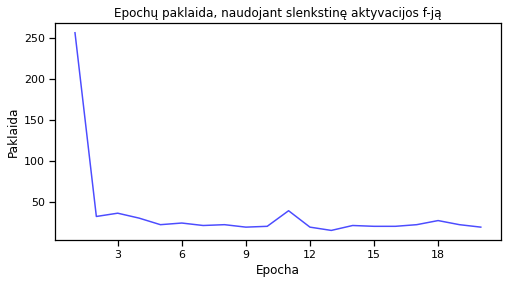

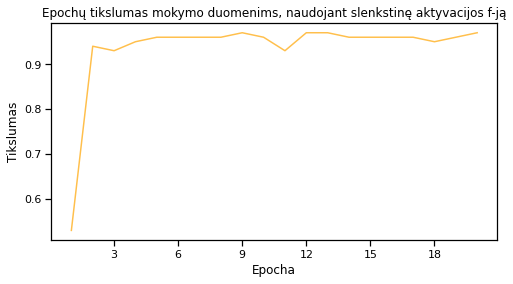

In [96]:
errors, accuracies, weights = train_perceptron(X2_train, y2_train, threshold, 0.5, 20)


print("Galutiniai svoriai: ", [round(i,2) for i in weights], 
      "\nGalutinė paklaida: ",  errors[-1],
      "\nGalutinis tikslumas: ",  accuracies[-1],
      "\nTikslumas testavimo duomenims: " ,  test_accuracy(X2_test, y2_test, weights, threshold)[0],
      "\nPaklaida testavimo duomenims: " ,  test_accuracy(X2_test, y2_test, weights, threshold)[1])

Galutiniai svoriai:  [-97.5, 0.0, 7.0, 4.5, 7.0, 4.0, 5.0, 2.5, -0.5, 10.5] 
Galutinė paklaida:  18.02 
Galutinis tikslumas:  0.96 
Tikslumas testavimo duomenims:  0.96 
Paklaida testavimo duomenims:  5.97


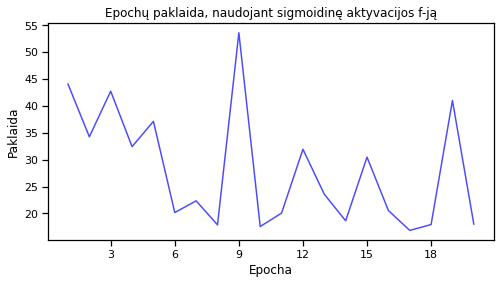

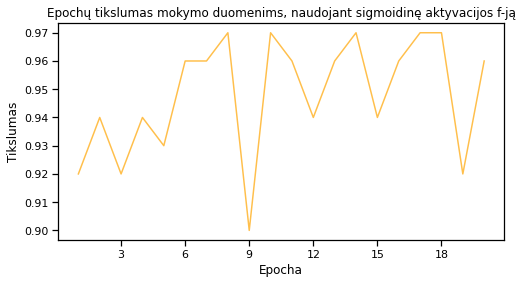

In [99]:
errors, accuracies, weights = train_perceptron(X2_train, y2_train, sigmoid, 0.5, 20)


print("Galutiniai svoriai: ", [round(i,2) for i in weights], 
      "\nGalutinė paklaida: ",  errors[-1],
      "\nGalutinis tikslumas: ",  accuracies[-1],
      "\nTikslumas testavimo duomenims: " ,  test_accuracy(X2_test, y2_test, weights, sigmoid)[0],
      "\nPaklaida testavimo duomenims: " ,  test_accuracy(X2_test, y2_test, weights, sigmoid)[1])

In [100]:
# grafikas, parodantys klasifikavimo tisklumo priklausomybę nuo mokymo epochos ir mokymosi greičio parametro reikšmių
def plot_heatmap(data, ax, title, left=True):
    cmap = sns.cm.mako_r
    plot=sns.heatmap(data, vmax=1,vmin=0.7,center=0.85,cbar=False,cmap=cmap,
            linewidth=1,annot=True, ax=ax)
    plot.set_title(title)
    plot.set_xlabel("Mokymosi greitis")
    if left:
        plot.set_ylabel("Epocha")
    plot.set_xticklabels(lrates)
    plot.set_yticklabels(range(1,data.shape[0]+1))
    plot.tick_params(axis='x', rotation=0)
    plot.tick_params(axis='y', rotation=360)

### Pirmi duomenys

In [87]:
lrates = np.round(np.arange(0.1, 1, 0.1),1)
results1 = np.zeros((20,len(lrates)))
results2 = np.zeros((20,len(lrates)))
for i,j in enumerate(lrates):
    _, accuracies, __ = train_perceptron(X1_train, y1_train, threshold, j, 20, plot=False)
    results1[:,i] = accuracies
    
    _, accuracies, __ = train_perceptron(X1_train, y1_train, sigmoid, j, 20, plot=False)
    results2[:,i] = accuracies

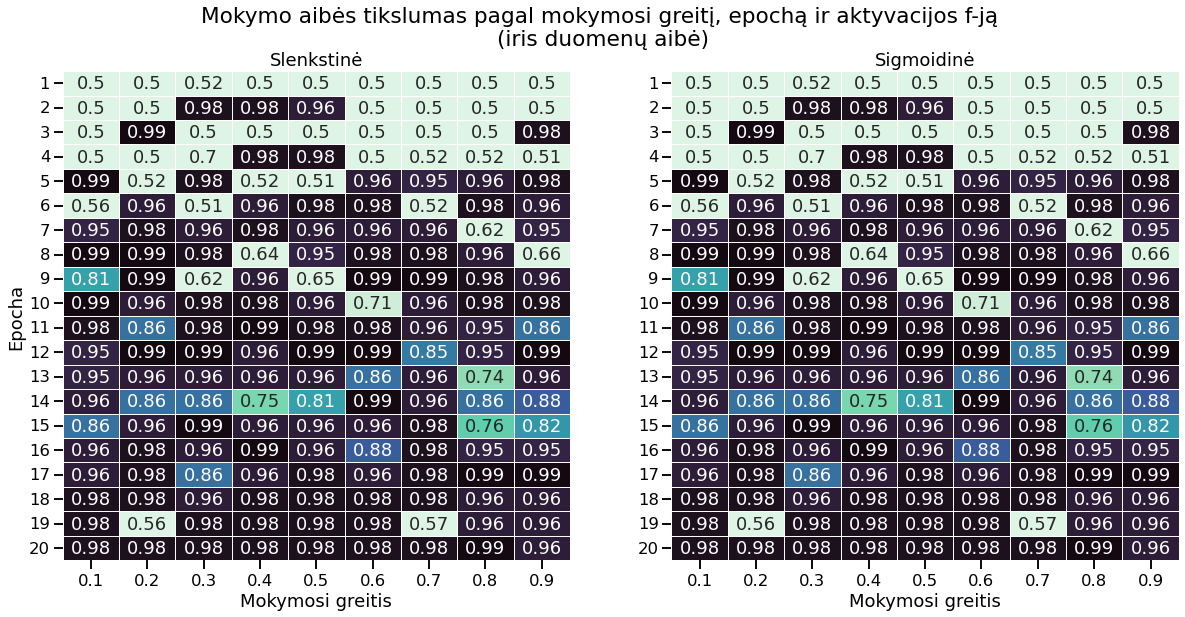

In [88]:
sns.set_context("talk")
fig, ax = plt.subplots(1,2,figsize=(20, 9))
fig.suptitle("Mokymo aibės tikslumas pagal mokymosi greitį, epochą ir aktyvacijos f-ją " + "\n(iris duomenų aibė)")
plot_heatmap(results1,ax[0], "Slenkstinė")
plot_heatmap(results2,ax[1], "Sigmoidinė", left=False)

In [89]:
errors, accuracy, weights = train_perceptron(X1_train, y1_train, threshold, 0.4, 4, plot=False)

print("Galutiniai svoriai: ", [round(i,2) for i in weights], 
      "\nTikslumas: ",  accuracy[-1],
      "\nPaklaida: ",  errors[-1],
      "\nTikslumas testavimo duomenims: " ,  test_accuracy(X1_test, y1_test, weights, threshold)[0],
      "\nPaklaida testavimo duomenims: " ,  test_accuracy(X1_test, y1_test, weights, threshold)[1])

Galutiniai svoriai:  [3.0, 5.4, 4.44, -7.6, -7.24] 
Tikslumas:  0.98 
Paklaida:  2 
Tikslumas testavimo duomenims:  1.0 
Paklaida testavimo duomenims:  0


### Antri duomenys

In [90]:
lrates = np.round(np.arange(0.1, 1, 0.1),1)
results1 = np.zeros((20,len(lrates)))
results2 = np.zeros((20,len(lrates)))
for i,j in enumerate(lrates):
    _, accuracies, __ = train_perceptron(X2_train, y2_train, threshold, j, 20, plot=False)
    results1[:,i] = accuracies
    
    _, accuracies, __ = train_perceptron(X2_train, y2_train, sigmoid, j, 20, plot=False)
    results2[:,i] = accuracies

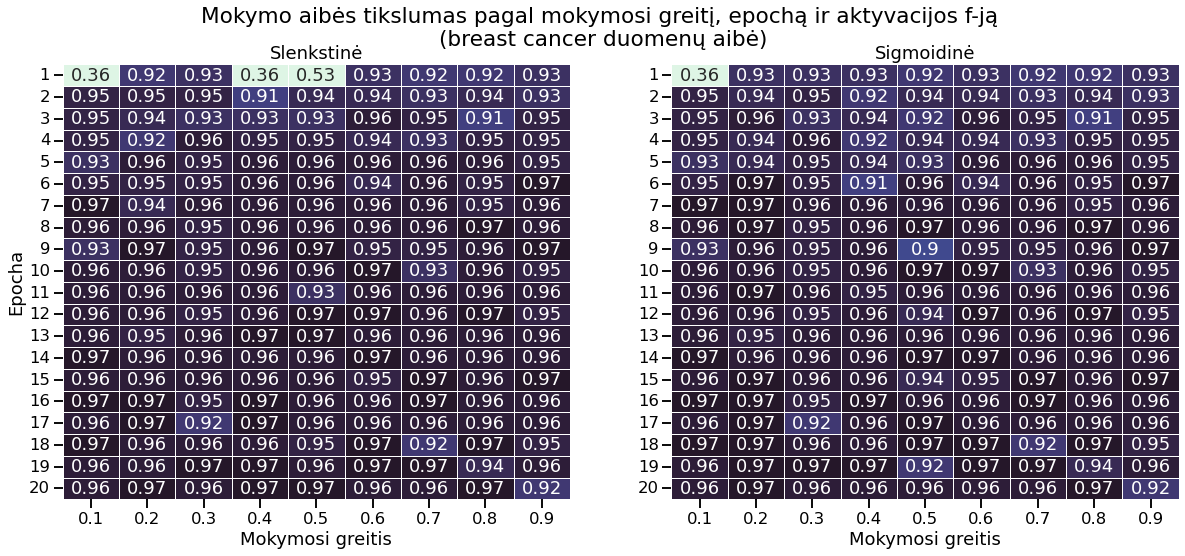

In [91]:
sns.set_context("talk")
fig, ax = plt.subplots(1,2,figsize=(20, 8))
fig.suptitle("Mokymo aibės tikslumas pagal mokymosi greitį, epochą ir aktyvacijos f-ją " + "\n(breast cancer duomenų aibė)")
plot_heatmap(results1,ax[0], "Slenkstinė")
plot_heatmap(results2,ax[1], "Sigmoidinė", left=False)

In [578]:
errors, accuracy, weights = train_perceptron(X2_train, y2_train, sigmoid, 0.7, 11, plot=False)

print("Galutiniai svoriai: ", [round(i,2) for i in weights], 
      "\nTikslumas: ",  accuracy[-1],
      "\nPaklaida: ",  errors[-1],
      "\nTikslumas testavimo duomenims: " ,  test_accuracy(X2_test, y2_test, weights, sigmoid)[0],
      "\nPaklaida testavimo duomenims: " ,  test_accuracy(X2_test, y2_test, weights, sigmoid)[1])

Galutiniai svoriai:  [-111.46, -0.98, 10.91, 10.45, 11.23, -0.08, 8.59, 0.08, 1.2, 4.07] 
Tikslumas:  0.97 
Paklaida:  18.47 
Tikslumas testavimo duomenims:  0.96 
Paklaida testavimo duomenims:  5.0


In [577]:
def output_predicted_true(X_test, y_test, weights, activation):
    # Apskaičiuoja tikslumą testavimo duomenims, naudojant pasirinktą aktyvacijos funkciją
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(round(activation(X_test[i],weights),0))
    pd.DataFrame.to_csv(pd.DataFrame({"Tikra reikšmė": np.array(y_test).astype(int),"Prognozuota reikšmė" : y_pred}),"a.csv")

In [579]:
output_predicted_true(X2_test, y2_test, weights, threshold)